# PRECISION - RECALL CURVE
---

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import requests
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix

import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Loading and preparing the data

In [2]:
iris_one = datasets.load_iris()
iris = pd.DataFrame(data=iris_one.data, columns=iris_one.feature_names)
iris['class'] = [iris_one.target_names[i] for i in iris_one.target]
print(iris.head())
print(list(iris["class"].unique()))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    class  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


---

# Versicolor VS Virginica

In [12]:
df = iris[iris["class"] != "setosa"]
print(df["class"].unique())

[np.str_('versicolor') np.str_('virginica')]


In [13]:
print((df['class'] == 'versicolor').sum())
print((df['class'] == 'virginica').sum())

50
50


I chose the value 1 for the Iris versicolor and the value 0 for the Iris virginica. I then replaced the original values in the column class to be able to make the classification.

In [14]:
df = df.replace('versicolor', 1)
df = df.replace('virginica', 0)
print(df["class"].unique())

[1 0]


/tmp/ipykernel_882785/757232755.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('virginica', 0)


In [15]:
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Logistic Regression Model

In [16]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### Prediction

In [17]:
# Predict probabilities for the test set
y_scores = model.predict_proba(X_test_scaled)[:, 1]
# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

### Best treshold (f1-score)

In [18]:
# Find the threshold that gives the best F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]
# Print the best threshold and corresponding F1-score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.2f}")

Best Threshold: 0.45
Best F1-score: 0.92


### Plot Precision Recall Curve

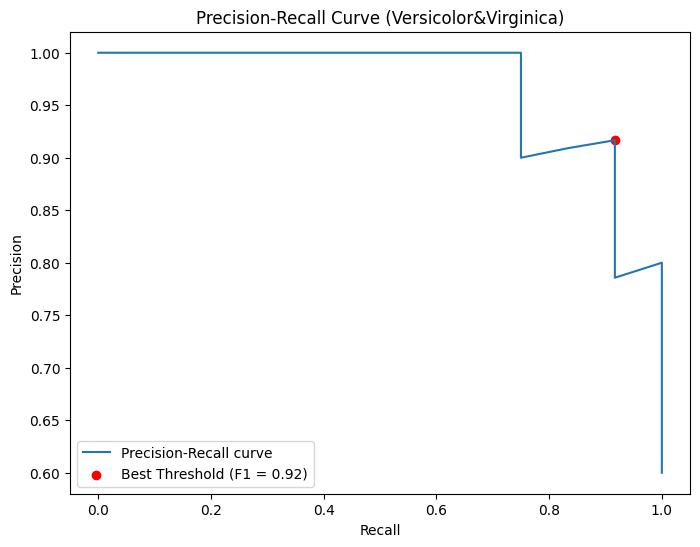

In [19]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Versicolor&Virginica)')
plt.legend(loc='best')
# Plot the threshold points
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', label=f'Best Threshold (F1 = {best_f1:.2f})')
plt.legend(loc='best')
plt.show()

### Evaluate the Model

In [20]:
# Evaluate the model using the best threshold
y_pred_best = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Confusion Matrix:
 [[ 7  1]
 [ 1 11]]


Here 7 is the number of True Negatives : the number of Iris virginica that were predicted as Iris virginica. And 11 is the number of True Positives : the number of Iris versicolor that were predicted as Iris versicolor.
The number of False Positive and False Negative are equal (1). The model predicted one Iris versicolor as a Iris virginica and it predicted one Iris virginica as a Iris versicolor.

# Imbalanced classes (Versicolor VS Virginica)

In [32]:
newdf = df.iloc[42:]
print((newdf['class'] == 1).sum())
print((newdf['class'] == 0).sum())
print(newdf["class"].unique())

8
50
[1 0]


I kept 8 Iris-versicolor and 50 Iris-virginica.

In [35]:
X = newdf.drop('class', axis=1)  # Features
y = newdf['class']               # Target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [37]:
# Predict probabilities for the test set
y_scores = model.predict_proba(X_test_scaled)[:, 1]
# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

In [38]:
# Find the threshold that gives the best F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]
# Print the best threshold and corresponding F1-score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.2f}")

Best Threshold: 0.56
Best F1-score: 1.00


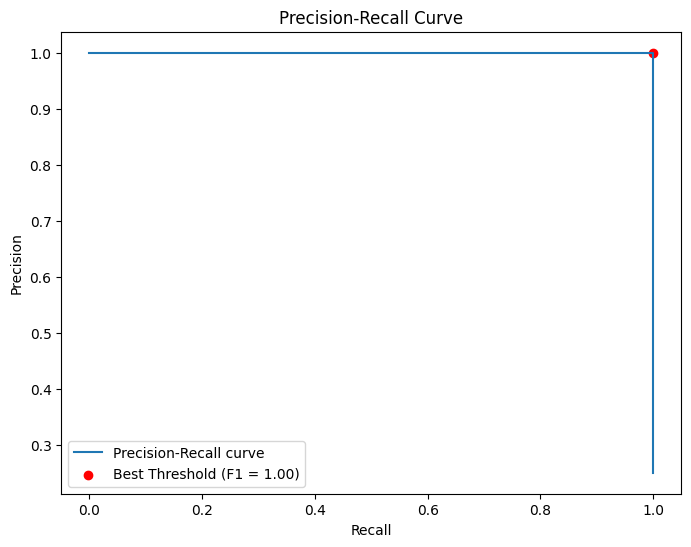

In [40]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
# Plot the threshold points
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', label=f'Best Threshold (F1 = {best_f1:.2f})')
plt.legend(loc='best')
plt.show()

In [41]:
# Evaluate the model using the best threshold
y_pred_best = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

Confusion Matrix:
 [[9 0]
 [0 3]]


---

# Setosa VS Virginica

In [7]:
df = iris[iris["class"] != "versicolor"]
print(df["class"].unique())
print((df['class'] == 'setosa').sum())
print((df['class'] == 'virginica').sum())

df = df.replace('setosa', 1)
df = df.replace('virginica', 0)
print(df["class"].unique())

[np.str_('setosa') np.str_('virginica')]
50
50
[1 0]


/tmp/ipykernel_882785/3472715610.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('virginica', 0)


In [4]:
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities for the test set
y_scores = model.predict_proba(X_test_scaled)[:, 1]
# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold that gives the best F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]
# Print the best threshold and corresponding F1-score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.2f}")

Best Threshold: 0.96
Best F1-score: 1.00


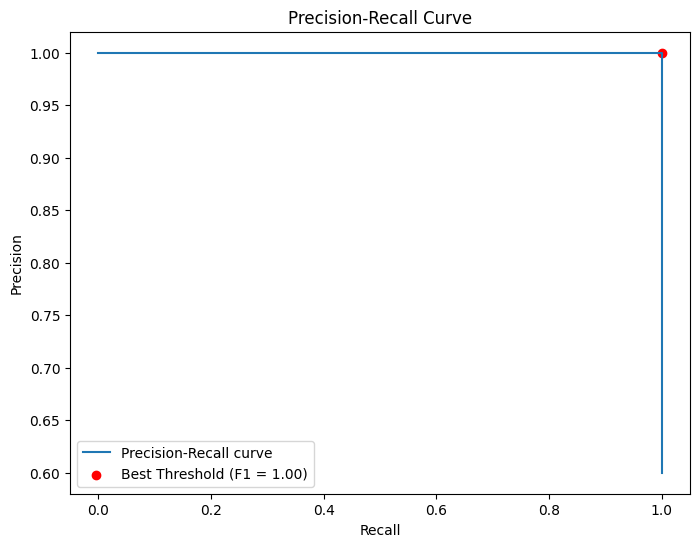

In [5]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
# Plot the threshold points
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', label=f'Best Threshold (F1 = {best_f1:.2f})')
plt.legend(loc='best')
plt.show()

In [6]:
# Evaluate the model using the best threshold
y_pred_best = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[ 8  0]
 [ 0 12]]


---

# Setosa VS Versicolor

In [9]:
df = iris[iris["class"] != "virginica"]
print(df["class"].unique())
print((df['class'] == 'setosa').sum())
print((df['class'] == 'versicolor').sum())

df = df.replace('setosa', 1)
df = df.replace('versicolor', 0)
print(df["class"].unique())

[np.str_('setosa') np.str_('versicolor')]
50
50
[1 0]


/tmp/ipykernel_882785/1377608653.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('versicolor', 0)


In [47]:
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities for the test set
y_scores = model.predict_proba(X_test_scaled)[:, 1]
# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold that gives the best F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]
# Print the best threshold and corresponding F1-score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.2f}")

Best Threshold: 0.95
Best F1-score: 1.00


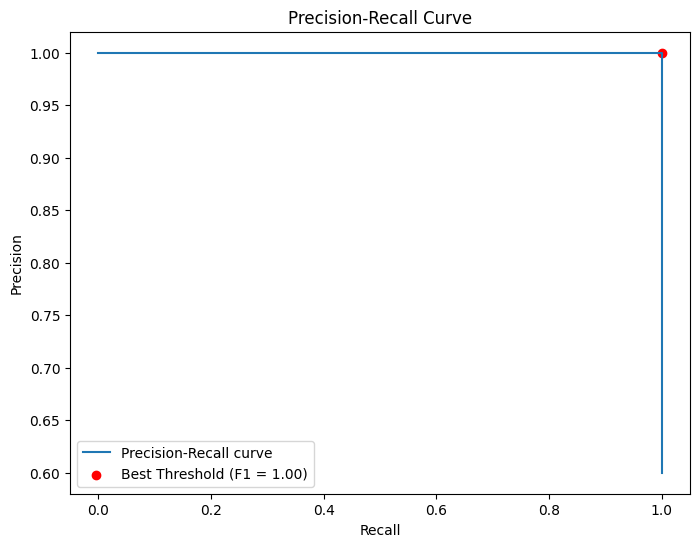

In [48]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
# Plot the threshold points
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', label=f'Best Threshold (F1 = {best_f1:.2f})')
plt.legend(loc='best')
plt.show()

In [49]:
# Evaluate the model using the best threshold
y_pred_best = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[ 8  0]
 [ 0 12]]


---

# Setosa VS All

In [3]:
df = iris
print(df["class"].unique())
print((df['class'] == 'setosa').sum())
print((df['class'] == 'virginica').sum())
print((df['class'] == 'versicolor').sum())

[np.str_('setosa') np.str_('versicolor') np.str_('virginica')]
50
50
50


In [16]:
df = df.replace('setosa', 1)
df = df.replace('virginica', 0)
df = df.replace('versicolor', 0)
print(df["class"].unique())
print((df['class'] == 1).sum())
print((df['class'] == 0).sum())

[1 0]
50
100


In [13]:
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities for the test set
y_scores = model.predict_proba(X_test_scaled)[:, 1]
# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold that gives the best F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]
# Print the best threshold and corresponding F1-score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.2f}")

Best Threshold: 0.94
Best F1-score: 1.00


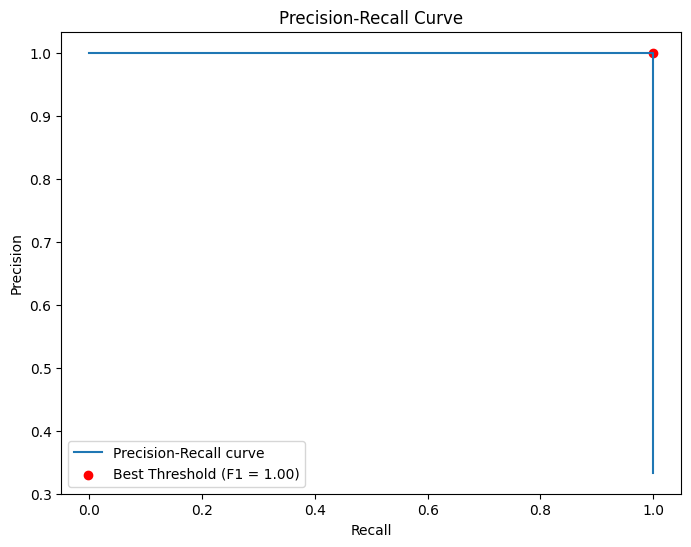

In [14]:
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
# Plot the threshold points
plt.scatter(recall[best_threshold_index], precision[best_threshold_index], color='red', label=f'Best Threshold (F1 = {best_f1:.2f})')
plt.legend(loc='best')
plt.show()

In [15]:
# Evaluate the model using the best threshold
y_pred_best = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[20  0]
 [ 0 10]]
